In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#get the data and take a first look of the 10 first lines
rivers=pd.read_csv('plastics-top-rivers.csv')
rivers.head(10)

,Entity,Country,sharePlastics
0,Agno,Philippines,0.469647
1,Agusan,Philippines,0.469647
2,Bharathappuzha,India,0.357340
3,Cagayan River,Philippines,0.234824
4,Cagayan de Oro,Philippines,0.265453
5,Chao Phraya,Thailand,0.408389
6,Chenzhen River,China,0.296082
7,Chilyar River,India,0.234824
8,Cilliwung,Indonesia,0.285872
9,Davao River,Philippines,0.265453


Variables:
* Entity: Specifies the river that emits plastic to the ocean
* Country: Country in which the river flows through
* sharePlastics: Share of global plastics emitted to ocean (%)

In [3]:
#let's see the columns and rows of the dataframe
rivers.shape


(50, 3)

In [4]:
#is there any missing value?
rivers.isna().sum()

Entity           0
Country          0
sharePlastics    0
dtype: int64

In [5]:
#let's see the statistics
rivers.describe()

,sharePlastics
count,50.000000
mean,0.539890
std,0.900586
min,0.224614
25%,0.255243
50%,0.290977
75%,0.426256
max,6.432129


In [6]:
#total number of countries in the dataset
rivers['Country'].nunique()

16

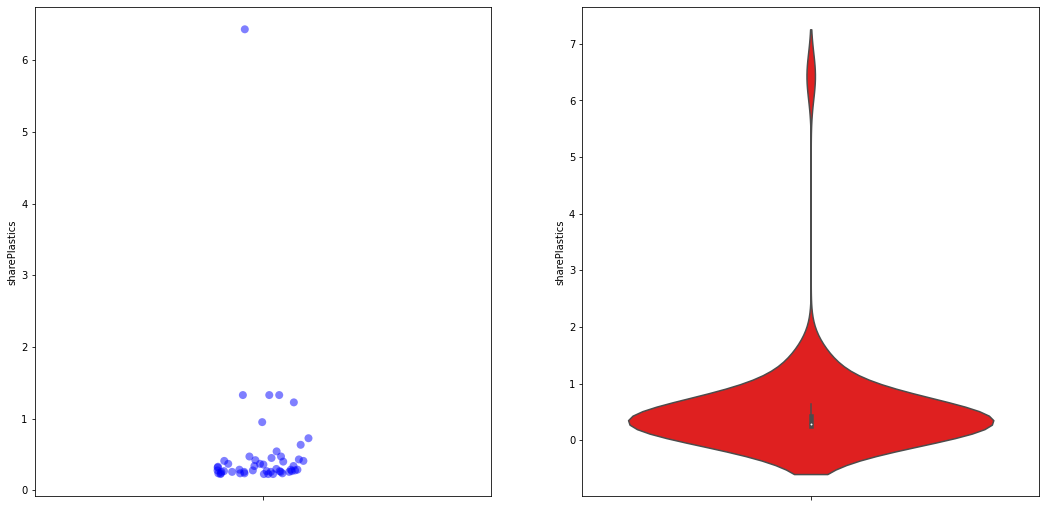

In [7]:
#now we plot the share plastics distributions in a strip plot and in a violin plot
fig, ax = plt.subplots(1,2, figsize=(18,9))
sns.stripplot(y=rivers['sharePlastics'], ax=ax[0], s=8, alpha=0.5, color='b')
sns.violinplot(y=rivers['sharePlastics'], ax=ax[1], color='r')
plt.show()

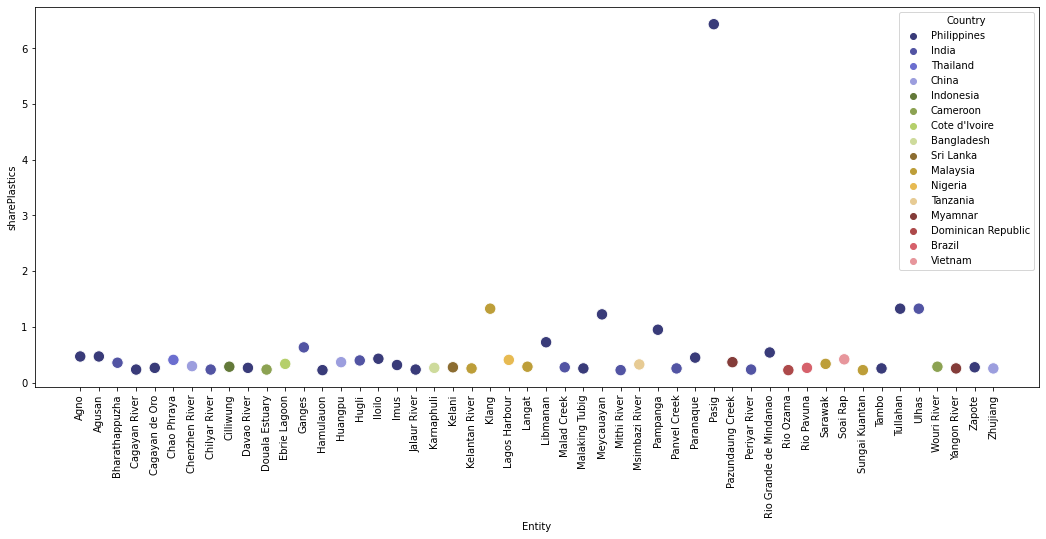

In [8]:
#Let's plot all the rivers
plt.figure(figsize=(18,7))
sns.scatterplot(x='Entity', y='sharePlastics', data=rivers, hue='Country', s=130, palette='tab20b')
plt.xticks(rotation='vertical')
plt.show()

In [9]:
#which are the 5 rivers with the biggest shares of plastics?
rivers_sorted=rivers.sort_values(by='sharePlastics', ascending= False)
rivers_sorted.head()

,Entity,Country,sharePlastics
34,Pasig,Philippines,6.432129
45,Ulhas,India,1.327265
44,Tullahan,Philippines,1.327265
22,Klang,Malaysia,1.327265
28,Meycauayan,Philippines,1.225167


In [10]:
#what is the total percentage of plastic emission?
rivers['sharePlastics'].sum()

26.994521456999998

In [11]:
#group by country 
rivers_by_country=rivers.groupby(['Country']).sum().sort_values(by=['sharePlastics'], ascending= False)
rivers_by_country

,sharePlastics
Country,
Philippines,15.345222
India,3.940955
Malaysia,2.429915
China,0.918876
Myamnar,0.622793
Cameroon,0.520696
Vietnam,0.418599
Nigeria,0.408389
Thailand,0.408389


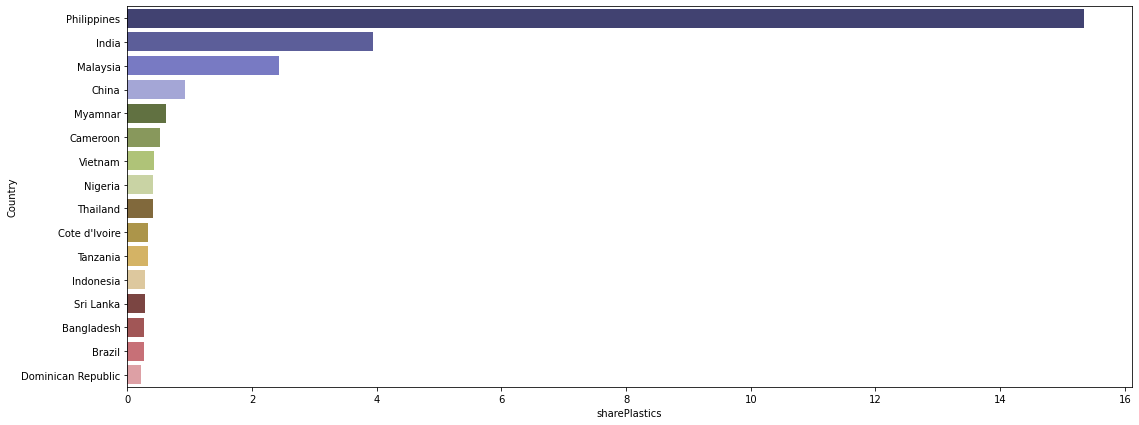

In [12]:
plt.figure(figsize=(18,7))
sns.barplot(x=rivers_by_country.sharePlastics, y=rivers_by_country.index, palette='tab20b')
plt.show()

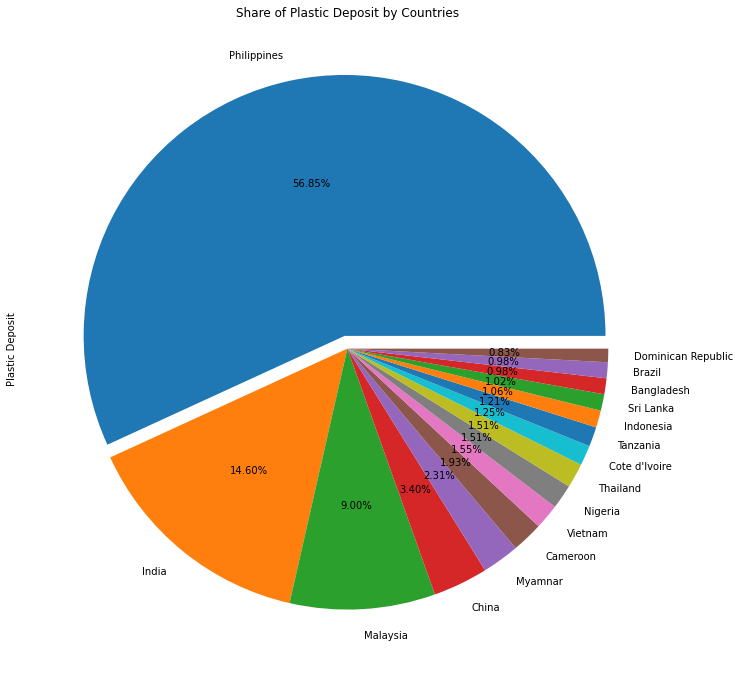

In [13]:
#lastly, a pie chart to look at percentages of plastics emission thorugh rivers in the ocean
explode=np.zeros(len(rivers_by_country))
explode[0]=0.05
plt.title('Share of Plastic Deposit by Countries')
rivers_by_country.sharePlastics.plot.pie(autopct='%1.2f%%', explode = explode, figsize=(12,12), label='Plastic Deposit')
plt.show()